# Trabajo Práctico - Aprendizaje Automático 2019 - Comisión 1

## Importación de las librería necesarias

* sklearn: https://scikit-learn.org/stable/ Machine Learning in Python
* pandas: https://pandas.pydata.org/ Python Data Analysis Library
* csv: https://realpython.com/python-csv/ Reading and Writing CSV Files in Python
* pydotplus: https://pypi.org/project/pydotplus/ Python Interface to Graphviz’s Dot language
    Se debe instalar https://www.graphviz.org/ y actualizar Anaconda
* matplotlib: https://matplotlib.org/  Python 2D plotting library


In [1]:
import sklearn.datasets as datasets
import pandas as pd
import random
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn.naive_bayes import GaussianNB

## Leer archivo csv (newdata.csv)

Recorre todas las filas del archivo csvfile y lo deja en lista a, en donde cada fila es una lista 

In [2]:
data_full = []
attributes_location=set()
attributes_description=set()
attributes_url=set()
attributes_verified=set()
attributes_lan=set()
attributes_default_profile=set()
attributes_default_profile_image=set()
attributes_has_extended_profile=set()
attributes_full=[]

with open('../data/newdata.csv','r') as csv_file:
    reader = csv.reader(csv_file)
    headers = next(reader,None)
    for row in reader:
        data_full.append (row)
        attributes_location.add(row[0])
        attributes_description.add(row[1])
        attributes_url.add(row[2])
        attributes_verified.add(row[8])
        attributes_lan.add(row[10])
        attributes_default_profile.add(row[11])
        attributes_default_profile_image.add(row[12])
        attributes_has_extended_profile.add(row[13])
        
attributes_full.append(list(attributes_location))
attributes_full.append(list(attributes_description))
attributes_full.append(list(attributes_url))
attributes_full.append(list(attributes_verified))
attributes_full.append(list(attributes_lan))
attributes_full.append(list(attributes_default_profile))
attributes_full.append(list(attributes_default_profile_image))
attributes_full.append(list(attributes_has_extended_profile))


print("Cantidad de Elementos: ",len(data_full))
print("Cantidad de Columnas a traducir: ",len(attributes_full))

Cantidad de Elementos:  2770
Cantidad de Columnas a traducir:  8


## Mapeo de categoricos

En la matriz ``` data_labeled ``` quedan los datos de entrenamiento.

El array ```y_vector_class ``` representa la clase a la que pertenece cada fila del array.

In [3]:
def process_to_category(data_raw, attributes_to_category):
    num_attributes=len(attributes_full)
    y_vector_class=[]
    data_labeled=[]

    le1 = preprocessing.LabelEncoder()
    le2 = preprocessing.LabelEncoder()
    le3 = preprocessing.LabelEncoder()
    le4 = preprocessing.LabelEncoder()
    le5 = preprocessing.LabelEncoder()
    le6 = preprocessing.LabelEncoder()
    le7 = preprocessing.LabelEncoder()
    le8 = preprocessing.LabelEncoder()
    le1.fit(attributes_full[0])
    le2.fit(attributes_full[1])
    le3.fit(attributes_full[2])
    le4.fit(attributes_full[3])
    le5.fit(attributes_full[4])
    le6.fit(attributes_full[5])
    le7.fit(attributes_full[6])
    le8.fit(attributes_full[7])

    for i in range(0,len(data_raw)):
        c0=le1.transform(data_raw[i][0:1])[0]
        c1=le2.transform(data_raw[i][1:2])[0]
        c2=le3.transform(data_raw[i][2:3])[0]
        c3=data_raw[i][3:4][0]
        c4=data_raw[i][4:5][0]
        c5=data_raw[i][5:6][0]
        c6=data_raw[i][6:7][0]
        c7=data_raw[i][7:8][0]
        c8=le4.transform(data_raw[i][8:9])[0]
        c9=data_raw[i][9:10][0]
        c10=le5.transform(data_raw[i][10:11])[0]
        c11=le6.transform(data_raw[i][11:12])[0]
        c12=le7.transform(data_raw[i][12:13])[0]
        c13=le8.transform(data_raw[i][13:14])[0]
        # Hay que armar C no solo con los traducibles sino tambien con los numericos.
        data_labeled.append([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13])

    # Separo la ultima columna como vector de resultado.
    for i in range(0,len(data_raw)):
        y_vector_class.append(data_raw[i][len(data_raw[1])-1])
    
    return data_labeled, y_vector_class

## Separación en conjuntos de entrenamiento y test

``` original_train_x, original_train_y ``` contienen el conjunto principal de los datos de entrenamiento.

``` test_X, test_Y ``` son los datos de test que no se van a utilizar hasta el final, para calcular el accuracy de los algoritmos.

In [4]:
data_labeled, y_vector_class = process_to_category(data_raw=data_full, attributes_to_category=attributes_full)

# Se separan los datos en dataFrame
# Creo el Data Frame para comenzar a separar en conjuntos de datos
dataFrame=pd.DataFrame(data_labeled)

original_train_X, test_X, original_train_y, test_y = train_test_split(dataFrame, y_vector_class, 
                                                   train_size=0.7,
                                                   test_size=0.3,
                                                   random_state=123)

print("train_X: " , len(original_train_X))
print("train_y: " ,len(original_train_y))
print("test_y: " ,len(test_y))
print("test_X: " ,len(test_X))

train_X, validate_X, train_y, validate_y = train_test_split(original_train_X, original_train_y, 
                                                   train_size=0.8,
                                                   test_size=0.2,
                                                   random_state=123)

print("------------------------")
print("train_X: " , len(train_X))
print("train_y: " ,len(train_y))
print("validate_X: " ,len(validate_X))
print("validate_y: " ,len(validate_y))

train_X:  1938
train_y:  1938
test_y:  831
test_X:  831
------------------------
train_X:  1550
train_y:  1550
validate_X:  388
validate_y:  388


## Funciones generales

### Modo graficosON: Habilitar la impresion de los graficos de todas las corridas

In [40]:
graficosON = "on"

### Exportación del árbol

In [6]:
def generate_graphviz_tree(tree, fileName):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    #Activar para imprimir grafo
    if (graficosON == "on"):
        graph.write_pdf("../data/imagenes/"+str(fileName)+".pdf")
    return Image(graph.create_png())

### Matriz de confusión

In [7]:
def calculate_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations, predictions)
    print("------------------------")
    print("Confusion matrix")
    print (matrix)
    return matrix

### Roc

In [8]:
def calculate_roc_curve(validations, predictions, fileName):
    ley = preprocessing.LabelEncoder()
    ley.fit(y_vector_class)
    roc_auc=roc_auc_score(ley.transform(validations), ley.transform(predictions))
    fpr, tpr, thresholds = roc_curve(ley.transform(validations), ley.transform(predictions))
    print("------------------------")
    #print(thresholds)
    #print(fpr)
    #print(tpr)
    print("Roc auc: ", roc_auc)
    plt.plot(fpr, tpr)
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    #plt.show()
    if (graficosON == "on"):    
        plt.savefig("../data/imagenes/"+str(fileName)+"_ROC.pdf")
    return plt

### Accuracy

In [9]:
def calculate_accuracy(validations, predictions):
    acc=accuracy_score(validations, predictions)
    print("------------------------")
    print ("Accuracy: ", acc)
    return acc

## Cálculo de predicciones

### Árboles de decisión

El parámetro ``` function ``` en **gini** indica que va a utilziar la medida de gini gain. En cambio si el valor es **entropy** va a utilizar information gain.

In [12]:
def training_data_to_tree(train_x, validate_x, train_y, validate_y, depth = 3, leafs = None, function = 'gini'):
    dtree=DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leafs, criterion=function)
    dtree.fit(train_x, train_y)
    predictions=dtree.predict(validate_x)
    return dtree, predictions

### Naive Bayes

In [13]:
def naive_bayes(train_x, validate_x, train_y, validate_y):
    gnb = GaussianNB()
    # Entrena con los datos
    gnb.fit(train_x, train_y)
    predictions=gnb.predict(validate_x)
    return predictions

### Primera prueba de la generación del árbol

------------------------
Accuracy:  0.8170103092783505
------------------------
Roc auc:  0.8219842284739983


<module 'matplotlib.pyplot' from '/home/ignacio/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

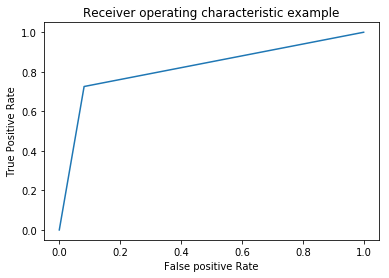

In [14]:
tree, predictions = training_data_to_tree(train_x=train_X, validate_x=validate_X, train_y=train_y, validate_y=validate_y,
                                          depth=3, leafs=None, function='gini')
generate_graphviz_tree(tree, fileName="corridasIniciales/tree_Inicial")
#calculate_confusion_matrix(validate_y, predictions)
calculate_accuracy(validate_y, predictions)
calculate_roc_curve(validate_y, predictions, fileName="corridasIniciales/Roc_tree_Inicial")

### Primera prueba Naive Bayes

------------------------
Accuracy:  0.6211340206185567
------------------------
Roc auc:  0.6013427109974425


<module 'matplotlib.pyplot' from '/home/ignacio/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

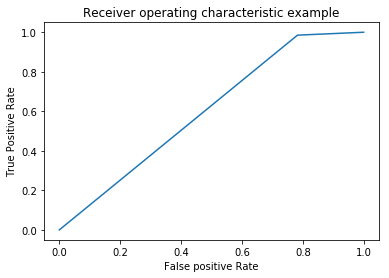

In [15]:
predictions_naive = naive_bayes(train_X, validate_X, train_y, validate_y)
#calculate_confusion_matrix(validate_y, predictions_naive)
calculate_accuracy(validate_y, predictions_naive)
calculate_roc_curve(validate_y, predictions_naive,"corridasIniciales/Roc_nBayes_Inicial" )

### 2.1 & 2.2 Grid search para árboles

Va a iterar sobre la altura para los valores 3, 6 y sin límite y por cada uno de ellos va a probar con la función gini gain e information gain.

In [17]:
def tree_predictions(train_x, validate_x, train_y, validate_y, depth, leafs, function, fileName):
    tree, predictions = training_data_to_tree(train_x, validate_x, train_y, validate_y,depth, leafs, function)
    print("profundidad: ",depth, ", ","funcion: " ,function,", ", " nodos: ",  tree.tree_.node_count)
    #calculate_accuracy(y_validate, predictions)
    #calculate_roc_curve(y_validate, predictions)
    calculate_accuracy(validate_y, predictions)
    calculate_roc_curve(validate_y, predictions,fileName)
    generate_graphviz_tree(tree,fileName)                                               

In [29]:
def grid_search_tree(train_x, validate_x, train_y, validate_y, KFoldName):
    depth_list = [3, 6, None]
    function_list = ['gini', 'entropy']
    for dep in depth_list:  
        for func in function_list:
            fileName = "gridSearch/"+KFoldName+"gridSearch_"+str(func)+"_"+str(dep)
            tree_predictions(train_x, validate_x, train_y, validate_y, depth=dep, leafs=None, function=func, fileName=fileName)
            #print("profundidad: ",dep, ", ","funcion: " ,func,", ", " nodos: ",  tree.tree_.node_count)       

## Cross validation KFold == 5

Arboles de decision
profundidad:  3 ,  funcion:  gini ,   nodos:  13
------------------------
Accuracy:  0.8387096774193549
------------------------
Roc auc:  0.8241180461329715
profundidad:  3 ,  funcion:  entropy ,   nodos:  15
------------------------
Accuracy:  0.8290322580645161
------------------------
Roc auc:  0.8049101085481682
profundidad:  6 ,  funcion:  gini ,   nodos:  65
------------------------
Accuracy:  0.864516129032258
------------------------
Roc auc:  0.8539687924016284
profundidad:  6 ,  funcion:  entropy ,   nodos:  49
------------------------
Accuracy:  0.8580645161290322
------------------------
Roc auc:  0.8527391451831752
profundidad:  None ,  funcion:  gini ,   nodos:  239
------------------------
Accuracy:  0.9
------------------------
Roc auc:  0.8959040027137041
profundidad:  None ,  funcion:  entropy ,   nodos:  211
------------------------
Accuracy:  0.867741935483871
------------------------
Roc auc:  0.8648236092265942

************************

Arbol

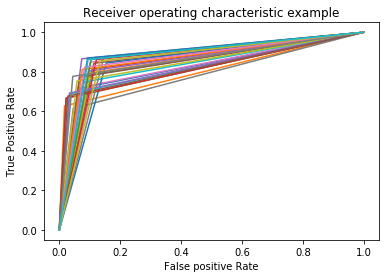

In [30]:
kf = ShuffleSplit(n_splits=5, test_size=0.20,random_state=np.random.seed(1234))

numpy_array_data_frame = train_X.to_numpy()
numpy_y_vector = np.array(train_y)
foldIndex=1
for train_index, validate_index in kf.split(train_X):
    # Aca hay que tomar promedio de los 5 folds y desvio
    X_train, X_validate = numpy_array_data_frame[train_index], numpy_array_data_frame[validate_index]
    y_train, y_validate = numpy_y_vector[train_index], numpy_y_vector[validate_index]
    print("Arboles de decision")
    grid_search_tree(train_x=X_train, validate_x=X_validate, train_y=y_train, validate_y=y_validate, KFoldName="tree_FOLD_"+str(foldIndex)+"_" )
    print("")
    #print("Naive Bayes")
    #predictions_naive = naive_bayes(train_x=X_train, validate_x=X_validate, train_y=y_train, validate_y=y_validate)
    #calculate_accuracy(y_validate, predictions_naive)
    #roc_graph = calculate_roc_curve(y_validate, predictions_naive)
    print("************************\n")
    foldIndex=foldIndex+1

### Mejores hiperparametros para los árboles

**Estos parametros deben ser cambiados cuando se haya realizado el analisis del algoritmo**

In [31]:
#Luego de analizados los resultado del punto 2.2 concluimos que la mejor combinación es la siguiente
best_depth = None
best_function = 'gini'

## Generacion de moda por dataFrame completo y por clase.

In [32]:
#Tomo la Moda por columna
modeList=[]
modeList_class0=[]
modeList_class1=[]
df_class0 = pd.DataFrame()
df_class1 = pd.DataFrame()
# Separo el df en dos df uno con las filas de la Clase0 y otro con las filas de la Clase1
for i in range(0,dataFrame.count()[0]):
    if (y_vector_class[i]=='1'):
        df_class1 = df_class1.append(dataFrame.iloc[i])
    else:
        df_class0 = df_class0.append(dataFrame.iloc[i])

for i in range(0,len(dataFrame.columns)):
    modeList.append(dataFrame.mode()[i][0])
    
for i in range(0,len(df_class0.columns)):
    modeList_class0.append(df_class0.mode()[i][0])
    
for i in range(0,len(df_class1.columns)):
    modeList_class1.append(df_class1.mode()[i][0])

#print("Cantidad de Columnas del DF: ", len(dataFrame.columns)) 
#print("Lista con las modas de las columnas del DF completo: ")
#print("# Elementos del dataFrame Full: ",dataFrame.count()[0])
#print(modeList)
#print("\n----------------------\n")
#print("Lista con las modas de las columnas del DF Clase0 completo: ")
#print("# Elementos del df Clase0: ",df_class0.count()[0])
#print(modeList_class0)
#print("\n----------------------\n")
#print("Lista con las modas de las columnas del DF Clase1 completo: ")
#print("# Elementos del df Clase1: ",df_class1.count()[0])
#print(modeList_class1)
#print("\n----------------------\n")

#df_class0.to_csv(r'./df_class0.csv')
#df_class1.to_csv(r'./df_class1.csv')

## Funcion ind_ruido: Introduce un porcentaje de ruido a un numero.

In [33]:
#random.normal(0,1,100)
# 0 media de la distribucion normal de la que estoy eligiendo.
# 1 standard deviation de la distribucion normal.
# 100 Cantidad de elementos en el array de ruido
def ind_ruido(value):
    noise=0
    for i in range(1,50):
        noise = noise+abs(np.random.normal(0,1,1)[0])
    noise=noise/50    
    value_noise=value+noise
    return value_noise


## Reemplaza un % valores al azar en una columna.

In [34]:
# df: DataFrame a modificar.
# column: Columna a la que se le quiere aplicar el cambio.
# percentaje: % de datos a cambiar.
# newValue: Nuevo valor a aplicar.
def replaceValueDf(df, column, percentage, newValue, noise):
    lenDF = len(df)
    replacePositions=[]
    percentage=int(round(df.count()[0]*(percentage/100)))
    #print("Porcentaje de los datos a cambiar:", percentage)
    for x in range(percentage):
        replacePositions.append(random.randint(0,lenDF))
            
    #print(replacePositions)
    
    for i in range(0,len(replacePositions)):
        #print("# fila: ",replacePositions[i]," columna: ", column, " newValue: ",newValue)
        #print("DATO: ",df.iat[replacePositions[i]-2,column-1])
        if(noise == "true"):
            newValue=ind_ruido(int(df.iat[replacePositions[i]-2,column-1]))
        df.iloc[replacePositions[i]-2,column-1]=newValue
      
    return df

## 2.4. Tolerancia a Ruido: Modificar atributos agregandoles ruido en porcentajes de 0% a 35% con un paso de 5%

% de valores a modificar:  0
profundidad:  None ,  funcion:  gini ,   nodos:  291
------------------------
Accuracy:  0.8427835051546392
------------------------
Roc auc:  0.8427642796248935
% de valores a modificar:  5
profundidad:  None ,  funcion:  gini ,   nodos:  291
------------------------
Accuracy:  0.8556701030927835
------------------------
Roc auc:  0.8555520034100597
% de valores a modificar:  10
profundidad:  None ,  funcion:  gini ,   nodos:  289
------------------------
Accuracy:  0.8530927835051546
------------------------
Roc auc:  0.8533674339300938
% de valores a modificar:  15
profundidad:  None ,  funcion:  gini ,   nodos:  295
------------------------
Accuracy:  0.8556701030927835
------------------------
Roc auc:  0.8555520034100597
% de valores a modificar:  20
profundidad:  None ,  funcion:  gini ,   nodos:  295
------------------------
Accuracy:  0.8427835051546392
------------------------
Roc auc:  0.8432971014492754
% de valores a modificar:  25
profundidad:

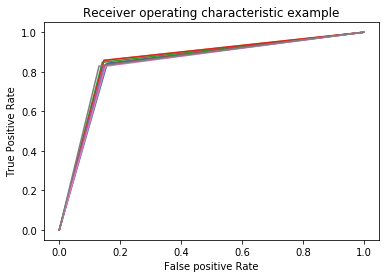

In [36]:
column=5
def ind_ruido_DF(df, column):
    for i in range(5,36,5):
        print("% de valores a modificar: ",i)
        replaceValueDf(df, column, i, 0, "true")
        fileName = "noise/tree_NOISE_"+str(i)+"%_"
        tree_predictions(train_x=df, validate_x=validate_X, train_y=train_y, validate_y=validate_y,
                                             depth=best_depth, leafs=None, function=best_function, fileName=fileName)

dfNoise =train_X.copy(deep=True)
ind_ruido_DF(dfNoise, column)

## 2.3 Reemplazo datos de la columna por Moda de DF, Moda del DF_Clase0, Moda del DF_Clase1

% de valores a modificar:  5  modaTotal, modaClass0, modaClass1:  2220 2220 36300
Moda total de columna
profundidad:  None ,  funcion:  gini ,   nodos:  299
------------------------
Accuracy:  0.8505154639175257
------------------------
Roc auc:  0.8511828644501279
Moda total de columna en clase_0
profundidad:  None ,  funcion:  gini ,   nodos:  293
------------------------
Accuracy:  0.8402061855670103
------------------------
Roc auc:  0.8400468883205456
Moda total de columna en clase_1
profundidad:  None ,  funcion:  gini ,   nodos:  291
------------------------
Accuracy:  0.8427835051546392
------------------------
Roc auc:  0.8430306905370845

----------------------

% de valores a modificar:  10  modaTotal, modaClass0, modaClass1:  2220 2220 36300
Moda total de columna
profundidad:  None ,  funcion:  gini ,   nodos:  291
------------------------
Accuracy:  0.8427835051546392
------------------------
Roc auc:  0.8427642796248935
Moda total de columna en clase_0
profundidad:  None 

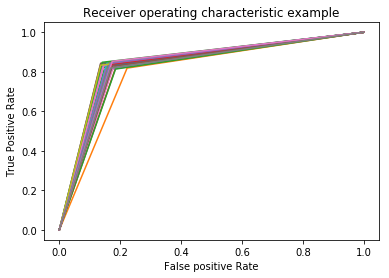

In [37]:
# Reemplazar la columna 5 por la moda de la Columna y por la moda de la clase0 y clase1
column=5
dfMode=[]
dfMode_class0=[]
dfMode_class1=[]

for i in range(5,81,5):
    print("% de valores a modificar: ",i," modaTotal, modaClass0, modaClass1: ", modeList[5], modeList_class0[5], modeList_class1[5])
    dfMode =train_X.copy(deep=True)
    dfMode_class0=train_X.copy(deep=True)
    dfMode_class1=train_X.copy(deep=True)
    replaceValueDf(dfMode, column, i, modeList_class0[column], "false")
    print("Moda total de columna")
    fileName = "mode/tree_MODATOTAL_"+str(i)+"%_"
    tree_predictions(train_x=dfMode, validate_x=validate_X, train_y=train_y, validate_y=validate_y,
                                         depth=best_depth, leafs=None, function=best_function, fileName=fileName)
    
    fileName = "mode/tree_MODACLASE_0_"+str(i)+"%_"
    print("Moda total de columna en clase_0")
    replaceValueDf(dfMode_class0, 5, i, modeList_class0[column], "false")
    tree_predictions(train_x=dfMode_class0, validate_x=validate_X, train_y=train_y, validate_y=validate_y,
                                         depth=best_depth, leafs=None, function=best_function, fileName=fileName)
    fileName = "mode/tree_MODACLASE_1_"+str(i)+"%_"
    print("Moda total de columna en clase_1")
    replaceValueDf(dfMode_class1, 5, i, modeList_class1[column], "false")
    tree_predictions(train_x=dfMode_class1, validate_x=validate_X, train_y=train_y, validate_y=validate_y,
                                         depth=best_depth, leafs=None, function=best_function, fileName=fileName)
    print("\n----------------------\n")
    
#dfMode.to_csv("./dfMode.csv")

## 4. Comparación de algoritmos

In [38]:
print("Arbol de decision")
# Reemplazar depth y function por los que mejor dieron
tree, predictions = training_data_to_tree(train_x=original_train_X, validate_x=test_X, train_y=original_train_y, validate_y=test_y,
                                          depth=best_depth, leafs=None, function=best_function)
calculate_accuracy(test_y, predictions)
    
print("")
print("Naive Bayes")
predictions_naive = naive_bayes(train_x=original_train_X, validate_x=test_X, train_y=original_train_y, validate_y=test_y)
calculate_accuracy(test_y, predictions_naive)

Arbol de decision
------------------------
Accuracy:  0.8471720818291215

Naive Bayes
------------------------
Accuracy:  0.6341756919374247


0.6341756919374247